In [1]:
import numpy as np
import cv2
# from google.colab.patches import cv2_imshow
from scipy.spatial import distance
import matplotlib.pyplot as plt
ep=10
import math
import itertools

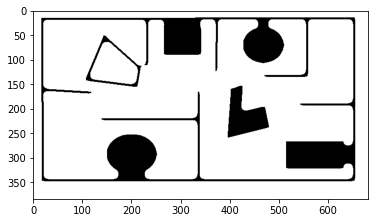

In [3]:
#assuming the robot is circular in shape
def configspace(img,L):
    circle=np.zeros([2*L,2*L,3],dtype=np.uint8)
    circle=cv2.circle(circle,(L,L), L, (255,255,255), -1)
    struct_element=cv2.cvtColor(circle, cv2.COLOR_BGR2GRAY)
    struct_element[struct_element>0]=1
    # plt.imshow(struct_element.astype(np.uint8))
    # print(struct_element)
    closing = cv2.morphologyEx(img, cv2.MORPH_OPEN, struct_element)
    return closing

img=cv2.imread("untitled.png")
# plt.imshow(img.astype(np.uint8))
closed=configspace(img, 10)
plt.imshow(closed.astype(np.uint8))


In [63]:
def rrt_holon(img, t1, t2):
    ep=10
    gra = {(x,y) : [] for x in range(img.shape[0]) for y in range(img.shape[1])}
    config=configspace(img,10) #updated obstacles
    for i in range(100):
        available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
        qRand = available[np.random.randint(0,len(available))]
#         qRand = [100,20]
#         t1t = t1.copy()
#         t1t -= qRand
#         t1t = t1t ** 2
#         tsum = []
#         for x,y in t1t:
#             tsum.append(x + y)
#         tsum = np.asarray(tsum)
        calc = distance.cdist(t1,[qRand])
        qNear = t1[np.argmin(calc)]
        u = qRand - qNear
        if np.linalg.norm(u) == 0: continue
        v = u / np.linalg.norm(u)
        qNew = qNear + ep*v
        qNew = np.asarray(qNew,dtype=np.int64) 
        imgcpy = config.copy()
        prevobs = np.sum(np.all(imgcpy == (0,0,0), axis=2))
        cv2.line(imgcpy,(int(qNear[0]),int(qNear[1])),(int(qNew[0]),int(qNew[1])),(0,0,255))
#         newline = np.array(np.where((imgcpy == [0, 0, 255]).all(axis = 2))).T
#         flg = 1
        newobs = np.sum(np.all(imgcpy == (0,0,0), axis=2))
        if prevobs == newobs:
            cv2.line(config,(int(qNear[0]),int(qNear[1])),(int(qNew[0]),int(qNew[1])),(0,0,255))
            tem = gra[(qNear[0],qNear[1])]
            tem.append([qNear[0],qNear[1],qNew[0],qNew[1]])
            gra[(qNew[0],qNew[1])] = tem
            t1 = np.vstack([t1,qNew])
#             available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
        plt.imshow(config.astype(np.uint8))
        if np.min(distance.cdist(t1,t2)) < 10 : 
#             print(tem)
            gra[(qNew[0],qNew[1])].append([qNew[0],qNew[1],t2[0][0],t2[0][1]])
            return gra[(qNew[0],qNew[1])]
#             break
        

In [84]:
def rrt_holon_recur(img, t1, t2,cnt = 0):
    ep=10
    cnt += 1
    if cnt == -1 :
        return False,[]
    gra = {(x,y) : [] for x in range(img.shape[0]) for y in range(img.shape[1])}
    config=img #updated obstacles
    available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
    qRand = available[np.random.randint(0,len(available))]
    calc = distance.cdist(t1,[qRand])
    qNear = t1[np.argmin(calc)]
    u = qRand - qNear
#     if np.linalg.norm(u) == 0: continue
    v = u / np.linalg.norm(u)
    qNew = qNear + ep*v
    qNew = np.asarray(qNew,dtype=np.int64) 
    imgcpy = config.copy()
    prevobs = np.sum(np.all(imgcpy == (0,0,0), axis=2))
    cv2.line(imgcpy,(int(qNear[0]),int(qNear[1])),(int(qNew[0]),int(qNew[1])),(0,0,255))
#         newline = np.array(np.where((imgcpy == [0, 0, 255]).all(axis = 2))).T
#         flg = 1
    newobs = np.sum(np.all(imgcpy == (0,0,0), axis=2))
    if prevobs == newobs:
        cv2.line(config,(int(qNear[0]),int(qNear[1])),(int(qNew[0]),int(qNew[1])),(0,0,255))
        tem = gra[(qNear[0],qNear[1])]
        tem.append([qNear[0],qNear[1],qNew[0],qNew[1]])
        gra[(qNew[0],qNew[1])] = tem
        t1 = np.vstack([t1,qNew])
        print(qNew)
#             available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
    plt.imshow(config.astype(np.uint8))
    if np.min(distance.cdist([qNew],t2)) < 10: 
#             print(tem)
        gra[(qNew[0],qNew[1])].append([qNew[0],qNew[1],t2[0][0],t2[0][1]])
        return True,[[qNew[0],qNew[1],t2[0][0],t2[0][1]],[qNear[0],qNear[1],qNew[0],qNew[1]]]
    tem,pat = rrt_holon_recur(config,t1,t2 , cnt)
    if tem == True:
        pat.append([qNear[0],qNear[1],qNew[0],qNew[1]])
        return True,pat
    return False,[]
#             break
        

[29 20]
[38 20]
[47 19]
[20 29]
[54 25]
[52 34]
[58 41]
[64 48]
[73 52]
[43 39]
[76 61]
[84 65]
[10 27]
[94 65]
[96 74]
[102  59]
[104  79]
[69 68]
[59 68]
[110  86]
[68 77]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[116  93]
[125  96]
[33 41]
[102  92]
[[102, 92, 100, 100], [110, 86, 102, 92], [43, 39, 33, 41], [116, 93, 125, 96], [110, 86, 116, 93], [69, 68, 68, 77], [104, 79, 110, 86], [69, 68, 59, 68], [76, 61, 69, 68], [96, 74, 104, 79], [94, 65, 102, 59], [94, 65, 96, 74], [84, 65, 94, 65], [20, 29, 10, 27], [76, 61, 84, 65], [73, 52, 76, 61], [52, 34, 43, 39], [64, 48, 73, 52], [58, 41, 64, 48], [52, 34, 58, 41], [54, 25, 52, 34], [47, 19, 54, 25], [20, 20, 20, 29], [38, 20, 47, 19], [29, 20, 38, 20], [20, 20, 29, 20]]


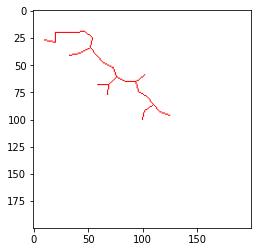

In [85]:
t1 = [[20,20]]
t2 = [[100,100]]
t1 = np.asarray(t1)
t2 = np.asarray(t2)
img = 255*np.ones((200,200,3))
# img1 = cv2.imread("untitled.png")
# cv2.line(img,(25,15),(25,175),(0,0,0),2)
# img1=cv2.imread("/content/maze.png")
# available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
tem,path = rrt_holon_recur(img,t1,t2)
print(path)
for x1,y1,x2,y2 in path:
#     print(x1,y1,x2,y2)
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0))
plt.imshow(img)
# print(t2[0][0],t2[0][1])

In [24]:
print(gra)

{(0, 0): [], (0, 1): [], (0, 2): [], (0, 3): [], (0, 4): [], (0, 5): [], (0, 6): [], (0, 7): [], (0, 8): [], (0, 9): [], (1, 0): [], (1, 1): [], (1, 2): [], (1, 3): [], (1, 4): [], (1, 5): [], (1, 6): [], (1, 7): [], (1, 8): [], (1, 9): [], (2, 0): [], (2, 1): [], (2, 2): [], (2, 3): [], (2, 4): [], (2, 5): [], (2, 6): [], (2, 7): [], (2, 8): [], (2, 9): [], (3, 0): [], (3, 1): [], (3, 2): [], (3, 3): [], (3, 4): [], (3, 5): [], (3, 6): [], (3, 7): [], (3, 8): [], (3, 9): [], (4, 0): [], (4, 1): [], (4, 2): [], (4, 3): [], (4, 4): [], (4, 5): [], (4, 6): [], (4, 7): [], (4, 8): [], (4, 9): [], (5, 0): [], (5, 1): [], (5, 2): [], (5, 3): [], (5, 4): [], (5, 5): [], (5, 6): [], (5, 7): [], (5, 8): [], (5, 9): [], (6, 0): [], (6, 1): [], (6, 2): [], (6, 3): [], (6, 4): [], (6, 5): [], (6, 6): [], (6, 7): [], (6, 8): [], (6, 9): [], (7, 0): [], (7, 1): [], (7, 2): [], (7, 3): [], (7, 4): [], (7, 5): [], (7, 6): [], (7, 7): [], (7, 8): [], (7, 9): [], (8, 0): [], (8, 1): [], (8, 2): [], (8,

In [21]:
def rrt_nonholon(img, t1, t2):
    init_theta=0
    del_t=1
    for i in range(500):
        available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
        qRand = available[np.random.randint(0,len(available))]
        calc = distance.cdist(t1,[qRand])
        qNear = t1[np.argmin(calc)]

        v, w = [-5, 5], [-math.pi/15, 0, math.pi/15]
        controls = list(itertools.product(v, w))
        max_dist = np.inf
        theta = 0
        qNew=[0,0]

        for crtl in controls:
            v1, w1 = crtl
            temp = [qNear[0] + v1*del_t*math.cos(init_theta + w1*del_t) , qNear[1] + v1*del_t*math.sin(init_theta + w1*del_t)]
            dist = np.linalg.norm(np.array(qRand)-np.array(temp))
            if dist < max_dist:
                qNew = temp
                theta = (init_theta + w1*del_t)
                max_dist = dist
        init_theta=theta
        qNew = np.asarray(qNew,dtype=np.int64)

        imgcpy = img.copy()
        prevobs = np.sum(np.all(imgcpy == (0,0,0), axis=2))
        cv2.line(imgcpy,(int(qNear[0]),int(qNear[1])),(int(qNew[0]),int(qNew[1])),(0,0,255))

        newobs = np.sum(np.all(imgcpy == (0,0,0), axis=2))
        if prevobs == newobs:
            cv2.line(img,(int(qNear[0]),int(qNear[1])),(int(qNew[0]),int(qNew[1])),(0,0,255))
            t1 = np.vstack([t1,qNew])
#         plt.figure()
        plt.imshow(img.astype(np.uint8))
        if np.min(distance.cdist(t1,t2)) < 10 : 
            break

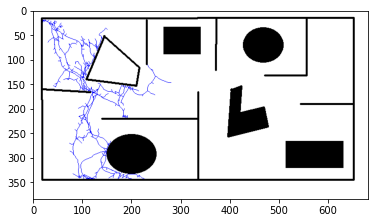

In [22]:
t1 = [[20,20]]
t2 = [[600,150]]
t1 = np.asarray(t1)
t2 = np.asarray(t2)
img = 255*np.ones((200,200,3))
#img1 = cv2.imread("untitled.png")
cv2.line(img,(25,15),(25,175),(0,0,0),2)
# plt.imshow(img1)
# available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
rrt_nonholon(img1,t1,t2)